In [1]:
import numpy as np
import matplotlib.pyplot as plt
import gwatpy.mcmc_routines as gmcmc
from corner import corner
import h5py 

In [2]:
N = 100
time = np.linspace(0,N,N)
dn = 2/ (N-1)
sigma = 1
beta = 5

In [3]:
true_data = np.loadtxt("../data/full_data_transdimensional_5_5_1_100.csv")
true_clean_data = np.loadtxt("../data/clean_data_transdimensional_5_5_1_100.csv")

In [4]:
def cheb_fn(P,coeff,x ):
    return np.sum(coeff[:P] * np.cos(np.arange(P)*np.arccos(x)))

In [5]:
data = gmcmc.RJPTMCMC_unpack_file("../data/output_trans.hdf5")
#dim_fixed = [5,6,4,3]
data_fixed_1 = gmcmc.trim_thin_file("../data/output_trans_fixed_dim1.hdf5")
data_fixed_2 = gmcmc.trim_thin_file("../data/output_trans_fixed_dim2.hdf5")
data_fixed_3 = gmcmc.trim_thin_file("../data/output_trans_fixed_dim3.hdf5")
data_fixed_4 = gmcmc.trim_thin_file("../data/output_trans_fixed_dim4.hdf5")

f1 = h5py.File("../data/output_trans_fixed_dim1.hdf5")
f2 = h5py.File("../data/output_trans_fixed_dim2.hdf5")
f3 = h5py.File("../data/output_trans_fixed_dim3.hdf5")
f4 = h5py.File("../data/output_trans_fixed_dim4.hdf5")

evidence1 = f1["MCMC_METADATA"]["EVIDENCE"][0]
evidence2 = f2["MCMC_METADATA"]["EVIDENCE"][0]
evidence3 = f3["MCMC_METADATA"]["EVIDENCE"][0]
evidence4 = f4["MCMC_METADATA"]["EVIDENCE"][0]
print(evidence1,evidence2,evidence3,evidence4)


trim:  0
ac:  31.0
trim:  0
ac:  37.0
trim:  0
ac:  23.2
trim:  0
ac:  16.6
-72.43684287788076 -73.16984716887376 -72.00767401966874 -74.55481573362349


[ 0.5  1.5  2.5  3.5  4.5  5.5  6.5  7.5  8.5  9.5 10.5]
Bayes factor 5/6 (RJ):  47.66525647805394
Bayes factor 5/6 (PTMCMC):  2.0813241276328394
Bayes factor 5/4 (RJ):  0.019788388177769036
Bayes factor 5/4 (PTMCMC):  0.6510499847624202
Bayes factor 5/3 (RJ):  0.25533126352645236
Bayes factor 5/3 (PTMCMC):  8.31426617624144
Bayes factor 4/3 (RJ):  12.903085447520198
Bayes factor 4/3 (PTMCMC):  12.77054968256464


(array([0.00000000e+00, 0.00000000e+00, 7.06025412e-02, 9.10990622e-01,
        1.80270361e-02, 3.78200756e-04, 1.60000320e-06, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00]),
 array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5]),
 <a list of 10 Patch objects>)

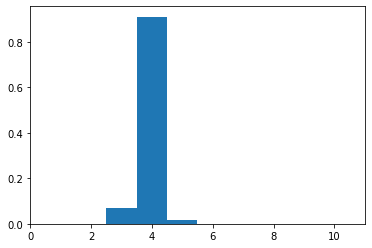

In [8]:
bins = np.linspace(0.5,len(data[1][0])+.5,len(data[1][0])+1)
print(bins)
dims = np.sum(data[1],axis=1)
print("Bayes factor 5/6 (RJ): ",np.sum(dims == 5) / np.sum(dims==6))
print("Bayes factor 5/6 (PTMCMC): ",np.exp(evidence1 - evidence2))
print("Bayes factor 5/4 (RJ): ",np.sum(dims == 5) / np.sum(dims==4))
print("Bayes factor 5/4 (PTMCMC): ",np.exp(evidence1 - evidence3))
print("Bayes factor 5/3 (RJ): ",np.sum(dims == 5) / np.sum(dims==3))
print("Bayes factor 5/3 (PTMCMC): ",np.exp(evidence1 - evidence4))
print("Bayes factor 4/3 (RJ): ",np.sum(dims == 4) / np.sum(dims==3))
print("Bayes factor 4/3 (PTMCMC): ",np.exp(evidence3 -evidence4))

plt.hist(dims,bins=bins,log=False,density=True)

In [7]:
recon = [[cheb_fn(np.sum(data[1][x,1:]), data[0][x,1:],-1 + dn *t) for t in np.arange(len(time))] for x in np.arange(5000)]
recon_fixed1 = [[cheb_fn(len(data_fixed_1[x,1:]), data_fixed_1[x,1:],-1 + dn *t) for t in np.arange(len(time))] for x in np.arange(5000)]
recon_fixed2 = [[cheb_fn(len(data_fixed_2[x,1:]), data_fixed_2[x,1:],-1 + dn *t) for t in np.arange(len(time))] for x in np.arange(5000)]
recon_fixed3 = [[cheb_fn(len(data_fixed_3[x,1:]), data_fixed_3[x,1:],-1 + dn *t) for t in np.arange(len(time))] for x in np.arange(5000)]
recon_fixed4 = [[cheb_fn(len(data_fixed_4[x,1:]), data_fixed_4[x,1:],-1 + dn *t) for t in np.arange(len(time))] for x in np.arange(5000)]


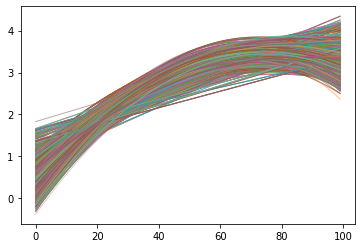

In [9]:
for x in recon:
    plt.plot(x,alpha=.5,linewidth=1)

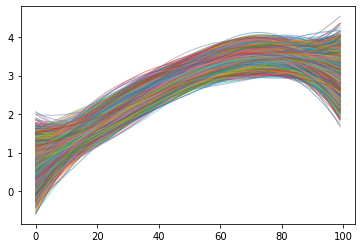

In [10]:
for x in recon_fixed1:
    plt.plot(x,alpha=.5,linewidth=1)

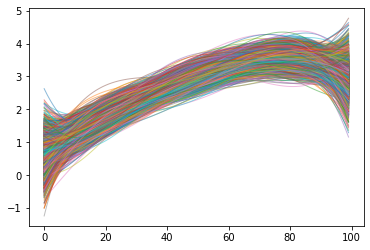

In [11]:
for x in recon_fixed2:
    plt.plot(x,alpha=.5,linewidth=1)

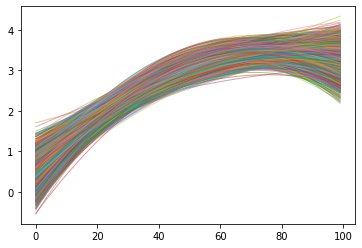

In [12]:
for x in recon_fixed3:
    plt.plot(x,alpha=.5,linewidth=1)

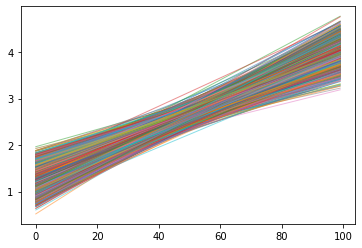

In [13]:
for x in recon_fixed4:
    plt.plot(x,alpha=.5,linewidth=1)

In [14]:
up = np.quantile(recon,.9,axis=0)
down = np.quantile(recon,.1,axis=0)
up_fixed1 = np.quantile(recon_fixed1,.9,axis=0)
down_fixed1 = np.quantile(recon_fixed1,.1,axis=0)
up_fixed2 = np.quantile(recon_fixed2,.9,axis=0)
down_fixed2 = np.quantile(recon_fixed2,.1,axis=0)
up_fixed3 = np.quantile(recon_fixed3,.9,axis=0)
down_fixed3 = np.quantile(recon_fixed3,.1,axis=0)
up_fixed4 = np.quantile(recon_fixed4,.9,axis=0)
down_fixed4 = np.quantile(recon_fixed4,.1,axis=0)

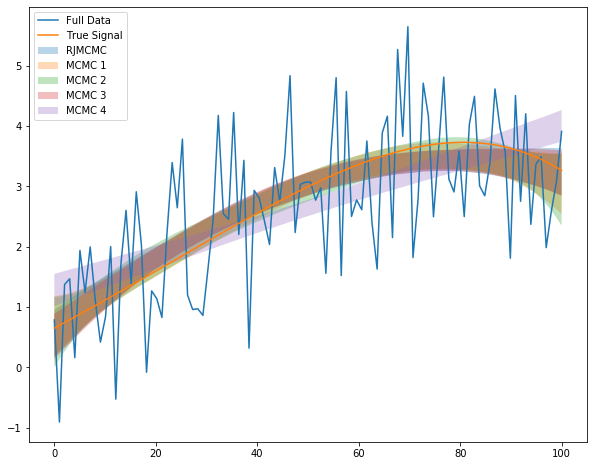

In [22]:
fig,ax = plt.subplots(nrows=1,ncols=1,figsize=[10,8])
ax.plot(time,true_data,label='Full Data')
ax.plot(time,true_clean_data,label="True Signal")
ax.fill_between(time,up,down,alpha=.3,label='RJMCMC')
ax.fill_between(time,up_fixed1,down_fixed1,alpha=.3,label='MCMC 1')
ax.fill_between(time,up_fixed2,down_fixed2,alpha=.3,label='MCMC 2')
ax.fill_between(time,up_fixed3,down_fixed3,alpha=.3,label='MCMC 3')
ax.fill_between(time,up_fixed4,down_fixed4,alpha=.3,label='MCMC 4')

ax.legend()

(array([ 38.,  16., 232., 331., 369., 290., 214., 165.,  30.,  13.]),
 array([-0.43679667, -0.35561568, -0.27443469, -0.19325371, -0.11207272,
        -0.03089173,  0.05028925,  0.13147024,  0.21265123,  0.29383221,
         0.3750132 ]),
 <a list of 10 Patch objects>)

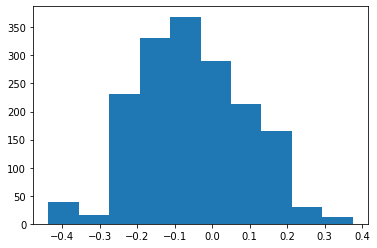

In [67]:
ID = 5
plt.hist(data[0][data[1][:,ID] == 1,ID])

In [16]:
dims = np.sum(data[1],axis=1)